# ML Course using Tensorflow etc

In [ ]:
#https://www.youtube.com/watch?v=WFr2WgN9_xE

# Linear Regression

# "features" are the data on which the prediction is made and "labels" are the values which are predicted

In [4]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [5]:
data=pd.read_csv("C:\\Users\\SID\\pythonpractice\\MLcourse\\data\\student-mat.csv",sep=";")

In [6]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [7]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
# using only these values for training and evaluation out of which G3 will be the label that we are going to predict and rest are the features used for prediction
data1=data[["G1","G2","G3","studytime","failures","absences"]]

In [10]:
data1.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [11]:
# label here is G3 this is what we are going to predict
predict="G3"

In [12]:
X=np.array(data1.drop([predict],1)) # features
y=np.array(data1[predict]) # labels/results corresponding those features


In [13]:
len(X)

395

In [14]:
len(y)

395

In [43]:
# train test split of data into different arrays dividing data into 2 parts
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)

In [44]:
# 90percent of the total data of training features is the size of training features(X)
len(x_train)

355

In [45]:
#90 percent of the total data of predictors data is used for test features(y)
len(y_train)

355

In [46]:
# 10 percent of the total predictors data is used for testing the model to calculate accuracy
len(y_test)

40

In [47]:
# 10 perrcent of the total features data is used for testing the model to calculate accuracy
len(x_test)

40

In [48]:
#defining the model to be used LINEAR REGRESSION 
linear=linear_model.LinearRegression()

In [49]:
linear

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
#train the model on training data using fitting the data 
linear.fit(x_train,y_train)
# accuracy score on test data
# the acc score will change if retrained as the data will be split into train and test differently and will be trained accordingly so it will show different accuracy score on different orientation of data, one way to get better accuracy is to use K fold cross validation 
acc = linear.score(x_test, y_test)

In [51]:
acc

0.8607597642076852

In [52]:
# viewing the coefficients
linear.coef_ # slope of each value in train data as it has only G1,G2,absences,failure,studytime (m)

array([ 0.18425922,  0.96140042, -0.22325237, -0.29092646,  0.03650851])

In [53]:
#viewing the coefficient
linear.intercept_ # intercept value (y)

-1.583029502399338

In [54]:
# predicting the labels(y_test) for features (x_test) on test data
predictions=linear.predict(x_test)

In [55]:
predictions

array([ 7.7615375 , 12.01465076, 14.34033708,  6.44378931, 11.30838513,
       10.71875577, 11.01082384,  7.61321173, 11.71838136,  8.20987025,
        9.05854366, 14.30597003, 16.4860471 , 13.08729337,  6.17434241,
        6.70183353, 12.7527988 , 11.05187686,  9.0933355 , 11.16597735,
       15.22837729,  4.1020742 ,  8.83074678, 12.08766778, 15.52044536,
       14.82583499,  8.61246369, 16.37403692, 11.01425719, 10.94124017,
        5.97790402, 15.11713509,  8.98055735,  7.38958572, 19.99604302,
       10.7240987 ,  5.4344777 , 10.12664176, 13.70373672,  2.74728139])

In [56]:
for i in range(len(predictions)):
    print(round(predictions[i]),x_test[i],y_test[i])


8.0 [11  8  2  0  2] 8
12.0 [12 12  1  0  2] 14
14.0 [13 15  4  0  0] 15
6.0 [ 7  8  2  3 10] 10
11.0 [12 12  4  0  1] 12
11.0 [11 11  2  0  4] 11
11.0 [11 11  2  0 12] 11
8.0 [ 9  8  2  1 16] 7
12.0 [12 12  2  0  0] 11
8.0 [ 7 10  4  1  2] 10
9.0 [ 8 10  2  0  0] 12
14.0 [14 14  1  0  2] 13
16.0 [15 16  1  0  4] 15
13.0 [13 13  1  0  0] 12
6.0 [8 7 2 0 0] 8
7.0 [ 6  8  1  3 16] 8
13.0 [12 13  2  0  2] 12
11.0 [ 9 12  3  0  3] 11
9.0 [ 7 10  2  0  6] 10
11.0 [11 12  3  1  4] 11
15.0 [15 15  2  0  2] 16
4.0 [6 5 2 0 6] 6
9.0 [10  9  2  0 10] 10
12.0 [12 12  1  0  4] 13
16.0 [15 15  2  0 10] 15
15.0 [12 15  1  0  0] 15
9.0 [8 9 1 0 8] 10
16.0 [16 16  2  0  2] 16
11.0 [13 11  2  0  2] 11
11.0 [13 11  2  0  0] 10
6.0 [ 7  6  2  0 26] 6
15.0 [14 15  2  0  4] 15
9.0 [10 10  4  0  0] 10
7.0 [ 7  8  2  0 12] 8
20.0 [18 19  1  0  6] 19
11.0 [11 11  1  1  6] 10
5.0 [7 6 1 0 5] 7
10.0 [11 10  1  0  8] 10
14.0 [13 13  2  0 23] 13
3.0 [7 4 1 2 0] 0


# Save the model

In [ ]:
# models need to be saved when the training takes longer time so that we can use it quicky later in app but it recommended using save a highest scoring model and pickle help us do that

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pickle

In [3]:
from matplotlib import style

In [39]:
# linear is the name of model trained above we save the trained model using pickle as below
# use the complete path to avoid any issues
with open("studentmodel.pickle","wb") as f:
    pickle.dump(linear,f)

In [40]:
# when trying to use the above trained linear regression model we can call the linear model using unpickling as shown below
# use the complete path to avoid any issues
# when using the model the code usually starts with this part as the previously defined portioned is already there in the variable of the model
pickle_in=open("studentmodel.pickle",'rb')
linear=pickle.load(pickle_in)

In [41]:
# viewing 
acc

0.7414686897139253

In [42]:
predictions

array([ 9.48406437,  6.7640072 , 19.90547805, 13.38364518,  5.13760299,
       18.15267007, 11.90004652, 11.81407551,  3.81528969, 18.51153833,
       13.10365634,  7.79650633,  8.56082885, 15.20675496, 14.26513157,
        8.5991133 ,  7.44148821, 14.37186965,  8.02616842,  5.49771896,
       12.84744513, 13.16074503,  6.61513453, 11.00055772, -0.43858729,
        5.98041947, 10.8029439 , 11.78160403, 13.10558141, -0.77329246,
       10.86154129, 10.66007733,  7.5000856 ,  9.38525746, -0.87527215,
        8.64124789, 12.19688362,  9.50052717, 17.09192682,  5.73749828])

In [57]:
# as the model accuracy keeps on changing we run the algo multiple times as everytime the split is random and we can either check it using K-foldCV or can loop the training as follows

# Running the algo to get the best trained model with higher accuracy from scratch

In [ ]:
# using for loop to check the best accuracy score for a few times and store the model by pickling

#reading the data file 

In [58]:
# import the necessary files but skipping as the kernel is active right now


In [59]:
# getting the data
data=pd.read_csv("C:\\Users\\SID\\pythonpractice\\MLcourse\\data\\student-mat.csv",sep=";")

In [60]:
# assinging the variable "predict" to the label that is the value which is to be predicted here G3 is being predicted
predict="G3"

In [61]:
# data has many value and attributes here 395 rows and 33 columns and 33 columns are a lot for a linear regression model to be used as attributes so getting rid of most of them right now and sticking to the most relevant ones for the use case here, i.e. predicitng the grade in 3rd sem so we will be using G!,G2,absences,failures,studytime as the predictor/ attribute and predict the lable here G3
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [62]:
# storing the new form of data with limited attributes in a different variable so that in case we need to view original data we can access it
data1=data[["G1","G2","absences","failures","studytime","G3"]]

In [63]:
data1

,G1,G2,absences,failures,studytime,G3
0,5,6,6,0,2,6
1,5,5,4,0,2,6
2,7,8,10,3,2,10
3,15,14,2,0,3,15
4,6,10,4,0,2,10
...,...,...,...,...,...,...
390,9,9,11,2,2,9
391,14,16,3,0,1,16
392,10,8,3,3,1,7
393,11,12,0,0,1,10


In [64]:
# shuffling the data 
shuffle(data1)

,G1,G2,absences,failures,studytime,G3
263,10,9,4,0,3,9
90,7,7,0,0,3,8
20,13,14,0,0,2,15
59,15,16,2,0,2,16
289,15,13,9,0,2,15
...,...,...,...,...,...,...
32,17,16,0,0,2,16
87,13,14,4,0,3,14
304,15,14,20,1,2,13
186,11,12,2,0,1,11


In [69]:
# dividing the atributes into dependent variables(y) and independent variables(X) for running the linear regression model
X=np.array(data1.drop([predict],1)) 
y=np.array(data1[predict])


In [70]:
# dividing the data into dependent train variables(x_train) and independent train variables(y_train) and test varibles ----> both dependent(x_test) and independent(y_train) Remember y is the value which is to be predicted and is dependent variable while the values which help in predicting is called independent variable x as they are supposed  to be independent of each other but have relevance on the dependent variable y 
# using sklearn's train_test_split method to divide the data into train(90 percent) and test(10percent)
x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)

In [73]:
# train model multiple times for best score
best=0
for _ in range(30): # taking 30 randomly can be more or less but as this is just linear regression so going for 30 as linear regression might not be used in industry
    x_train, x_test, y_train, y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.1)
    linear=linear_model.LinearRegression()  # using linear regression algo from sklearn and storing to variable and make it a model
    linear.fit(x_train,y_train) # fitting the model on training data with dependent and independent var
    acc=linear.score(x_test,y_test) # calculating the accuracy score on test data with dependent and independent var
    print(f"accuracy : {acc}")
    
    if acc>best:
        best=acc
        with open("C:\\Users\\SID\\pythonpractice\\MLcourse\\studentgrades.pickle","wb")as f: # if pickle of the model does not exist it will create one pickle file at the location else update the value with newer values 
            pickle.dump(linear,f) # saving the dump NOTICE the file name ok bro wb is write ....

accuracy : 0.8054616855908
accuracy : 0.7288741810795383
accuracy : 0.7697044228679139
accuracy : 0.7630256824705093
accuracy : 0.8370749617996686
accuracy : 0.7471294320668371
accuracy : 0.9074349909902554
accuracy : 0.7395962415124868
accuracy : 0.9418004899626411
accuracy : 0.9394124386230304
accuracy : 0.8427751504478262
accuracy : 0.684049027935531
accuracy : 0.6716314116224973
accuracy : 0.9241918758481834
accuracy : 0.8490275011936605
accuracy : 0.7418362839904915
accuracy : 0.765295159943175
accuracy : 0.8512011807213915
accuracy : 0.7752076652519952
accuracy : 0.8371650843646847
accuracy : 0.7811110866937897
accuracy : 0.8480836967393736
accuracy : 0.8702632109994903
accuracy : 0.7761965044861208
accuracy : 0.932290906012605
accuracy : 0.8608956896313449
accuracy : 0.8094767843646304
accuracy : 0.8992523220237447
accuracy : 0.8218652190012128
accuracy : 0.898887442428602


# Pickling the final model with highest accuracy on training data so that we can use it later on in production without having to train again

In [76]:
# loading the pickled model with best accuracy score
pickle_in= open("C:\\Users\\SID\\pythonpractice\\MLcourse\\studentgrades.pickle","rb") # rb stands for read ....
linear11=pickle.load(pickle_in)

In [78]:
print("coefficient: \n",linear11.coef_) # printing values for "m" from the linear regression equation y=mx+c
print("intercept \n",linear11.intercept_) # printing values for "c" from the linear regression equation y=mx+c 

coefficient: 
 [ 0.14483283  0.99065014  0.03627723 -0.21087857 -0.20822101]
intercept 
 -1.5226024196714647


In [82]:
# predicting the values on test set of the independent variable(x_test) using predict function
predicted =linear11.predict(x_test)

In [83]:
predicted

array([13.11217591, 20.06129244, 12.82223417,  9.20756425,  5.73800324,
       10.31182703,  4.59930544, 13.71377106, 15.35630698,  9.41606134,
       12.81362004, 13.74977221,  3.67232467, 12.89478863,  8.77874112,
       15.26541997, 12.39452046,  9.02179791, 14.02110532, 11.7655383 ,
        9.25657772, 10.55126823,  7.11890197, 16.31012774, 10.75948924,
        8.42513512,  6.43990523, 17.57266314,  5.79845778, 12.05575612,
        8.00547827, 19.11663796,  8.5250766 , 13.49610769, -0.9252146 ,
        6.07768511, 11.69325992,  3.45878854,  5.55808678, 14.94836728])

In [86]:
# viewing predicted value/labels, values of dependent variables in test set(x_test) and the actual label(Y_test) for matching the values
for i in range(len(predicted)):
    print(predicted[i],x_test[i],y_test[i])

13.112175913924652 [14 13  4  0  2] 13
20.06129244092499 [18 19 10  0  1] 19
12.822234170594873 [13 13  0  0  2] 12
9.207564250660567 [10 10  0  0  3] 9
5.738003240356056 [7 7 4 0 4] 6
10.311827025383597 [ 9  9 56  0  2] 8
4.599305437855319 [ 6  5 14  0  1] 5
13.71377105514115 [12 14  7  0  3] 14
15.356306981063103 [16 15  9  0  3] 16
9.416061336503375 [ 9 10  4  0  2] 10
12.813620043852609 [10 13  6  0  1] 13
13.749772206618788 [13 14  4  0  3] 14
3.6723246738735194 [6 5 0 1 2] 0
12.89478862540977 [13 13  2  0  2] 11
8.778741119739053 [9 9 8 0 1] 10
15.265419969044437 [14 15  3  0  1] 16
12.394520463575093 [10 13  6  1  2] 13
9.021797911397499 [10  9 28  1  3] 9
14.02110531681499 [13 14  0  0  1] 13
11.765538297623223 [14 12  0  1  2] 12
9.256577718256441 [11  9 19  1  1] 10
10.551268230580668 [11 11  0  0  2] 10
7.118901969001122 [10  8  3  3  1] 7
16.31012773810315 [18 16  0  0  3] 16
10.759489240493666 [11 11  0  0  1] 10
8.425135124266449 [10  9  0  0  2] 9
6.43990523058072 [7 8 2

In [87]:
for i in range(len(predicted)):
    print(round(predicted[i]),x_test[i],y_test[i])

13.0 [14 13  4  0  2] 13
20.0 [18 19 10  0  1] 19
13.0 [13 13  0  0  2] 12
9.0 [10 10  0  0  3] 9
6.0 [7 7 4 0 4] 6
10.0 [ 9  9 56  0  2] 8
5.0 [ 6  5 14  0  1] 5
14.0 [12 14  7  0  3] 14
15.0 [16 15  9  0  3] 16
9.0 [ 9 10  4  0  2] 10
13.0 [10 13  6  0  1] 13
14.0 [13 14  4  0  3] 14
4.0 [6 5 0 1 2] 0
13.0 [13 13  2  0  2] 11
9.0 [9 9 8 0 1] 10
15.0 [14 15  3  0  1] 16
12.0 [10 13  6  1  2] 13
9.0 [10  9 28  1  3] 9
14.0 [13 14  0  0  1] 13
12.0 [14 12  0  1  2] 12
9.0 [11  9 19  1  1] 10
11.0 [11 11  0  0  2] 10
7.0 [10  8  3  3  1] 7
16.0 [18 16  0  0  3] 16
11.0 [11 11  0  0  1] 10
8.0 [10  9  0  0  2] 9
6.0 [7 8 2 3 2] 9
18.0 [16 17  4  0  1] 18
6.0 [7 7 0 1 2] 0
12.0 [14 12  8  1  2] 12
8.0 [10  8 10  0  1] 9
19.0 [17 18 21  0  2] 18
9.0 [8 9 5 0 1] 9
13.0 [12 14  1  0  3] 15
-1.0 [7 0 0 0 2] 0
6.0 [5 8 0 3 2] 7
12.0 [13 12  2  1  2] 12
3.0 [6 5 0 3 1] 0
6.0 [7 7 5 3 2] 7
15.0 [14 15  0  0  2] 15


No handles with labels found to put in legend.


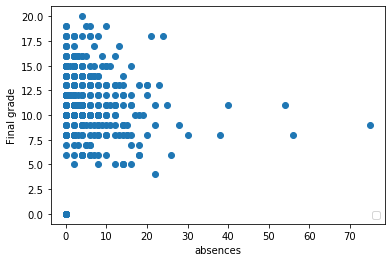

In [102]:
# drawing and plotting the model
style.use="ggplot"
plot="absences" # simply change it to use different attributes and see how it shows up use "failures","G2","G1","studytime"
plt.scatter(data1[plot],data1["G3"]) # scatter plot of G3 values between x and y variables , changing the value of x to G1,G2 etc we can see the correlation between that factor/ attribute and the label 
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final grade") # in the dataset the final grade is narrowed down to 20 and is not the percentage so the max value is 20 on y label
plt.show()